# preparation

##### libraries included

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Color uniformity

In [9]:
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
dark_blue_palette = [ '#1589FF','#2554C7', '#1569C7', '#157DEC']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=dark_blue_palette)

# Data exploration

In [10]:
#read the data
data=pd.read_csv("amazon_prime_titles.csv")

In [11]:
 #print the data
 data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [12]:
#Explore the number of lines and columns
num_rows, num_cols = data.shape
print("he number of rows:", num_rows)
print("he number of columns:", num_cols)

he number of rows: 9668
he number of columns: 12


In [13]:
#Explore the Type of data
print("Data types of each column:") 
print(data.dtypes)

Data types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


# Data cleaning

In [14]:
#Explore the misssing value
print("Missing values in each column:") 
print(data.isnull().sum())

Missing values in each column:
show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [15]:
#Get rid of some lines
data.dropna(subset=['rating','cast'], inplace=True)

In [16]:
#Replace empty values
data['country'] = data['country'].replace(np.nan, 'Unknown')
data['date_added'] = data['date_added'].replace(np.nan, 'Undefined')
data['director'] = data['director'].replace(np.nan, 'Undefined')

In [17]:
#Make sure to eliminate missing values
print("Missing values in each column  after cleaning:") 
print(data.isnull().sum())

Missing values in each column  after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [18]:
# get the  10 top_directors
top_directors = data['director'].value_counts().head(12)
top_directors = top_directors.drop('1')
print("Top 10 Prolific Directors:")
print(top_directors)

Top 10 Prolific Directors:
director
Undefined             1478
Mark Knight             38
Jay Chapman             23
Manny Rodriguez         22
John English            20
Cannis Holder           19
Joseph Kane             13
Michael J. Nelson       12
Brian Volk-Weiss        12
George Archainbaud      12
Aaron Michael           10
Name: count, dtype: int64


In [19]:
#get the  5 country
top_country= filtered_directors['country'].value_counts().head(5)
top_country.index[1:5]

NameError: name 'filtered_directors' is not defined

In [ ]:
top_genres = data['listed_in'].value_counts().head(10)

# Data Visualization

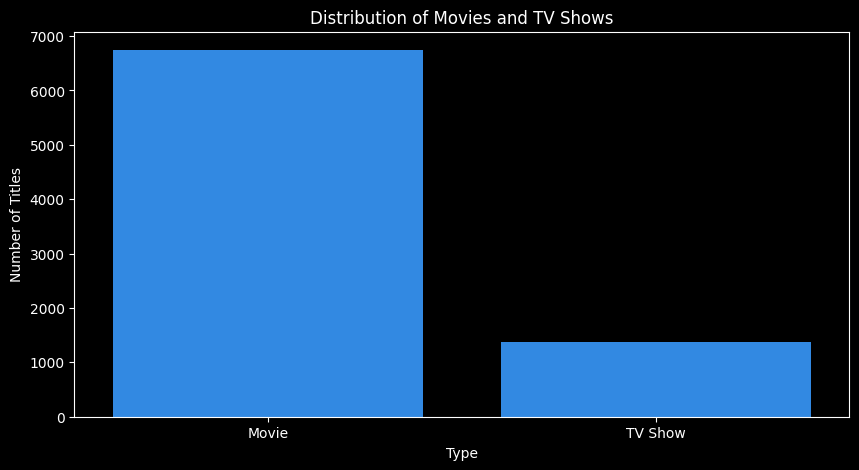

In [ ]:
# dentify the proportion of each movies and Tv show by plotting 
plt.figure(figsize=(10, 5))
palette = {"Movie": "blue", "TV Show": "green"}
sns.countplot( x=data['type'] )
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

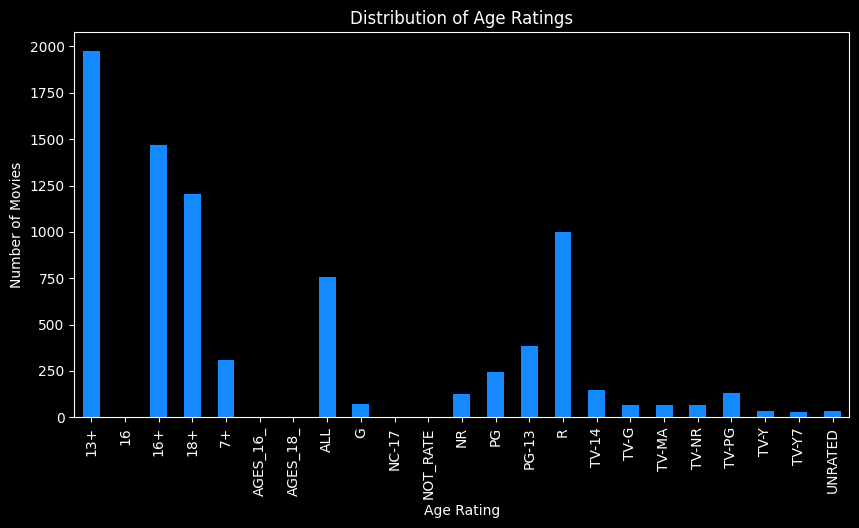

In [ ]:
#Distribution of Age Ratings
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(10, 5))
rating_counts.sort_index().plot(kind='bar')
plt.title('Distribution of Age Ratings')
plt.xlabel('Age Rating')
plt.ylabel('Number of Movies')
plt.show()

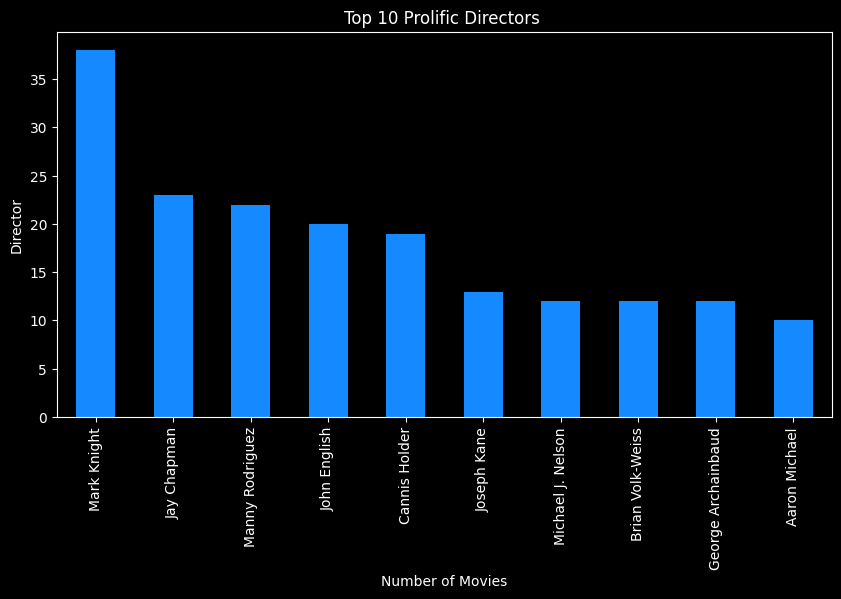

In [ ]:
# plot theTop 10 Prolific Directors
plt.figure(figsize=(10, 5))
top_directors[1:11].plot(kind='bar')
plt.title('Top 10 Prolific Directors ')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

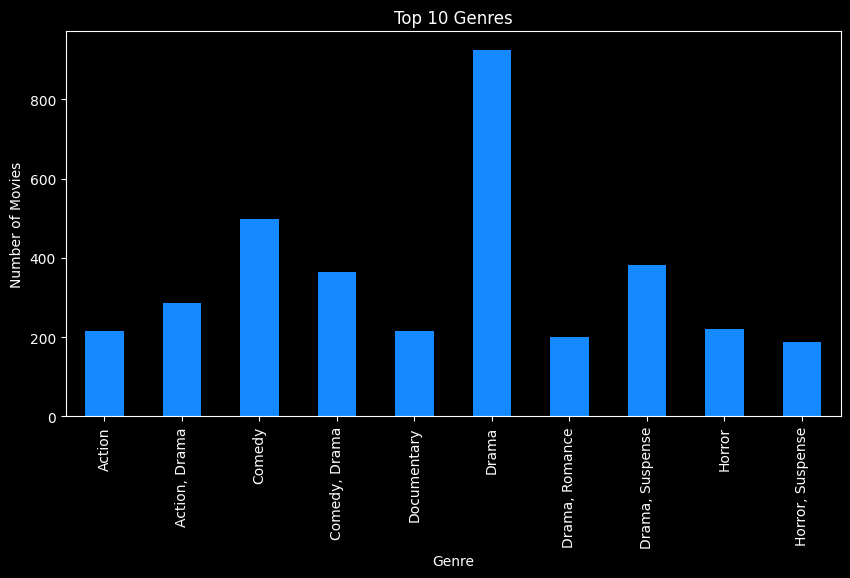

In [ ]:
#
plt.figure(figsize=(10, 5))
top_genres.sort_index().plot(kind='bar' )
plt.title('Top 10 Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.show()

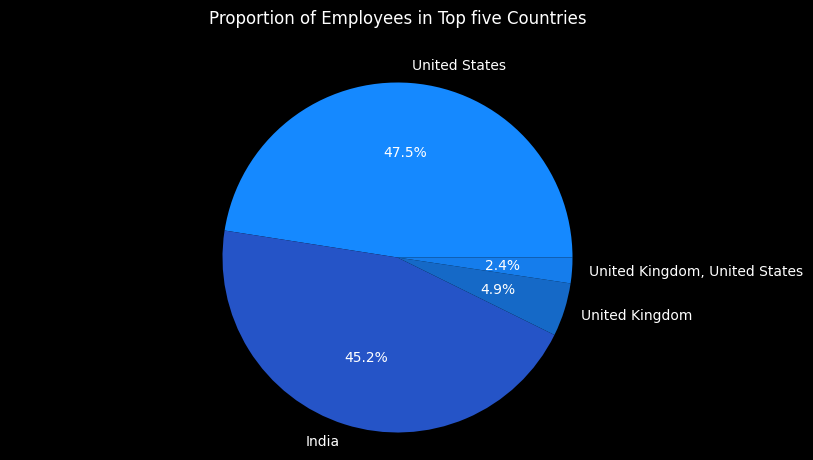

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(top_country[1:5], labels=top_country.index[1:5], autopct='%1.1f%%')
plt.title('Proportion of Employees in Top five Countries', pad=30)  # زيادة المسافة بين العنوان والرسمة
plt.axis('equal')
plt.show()


Text(6.5749722222222236, 0.5, 'Number of Movies')

<Figure size 1000x500 with 0 Axes>

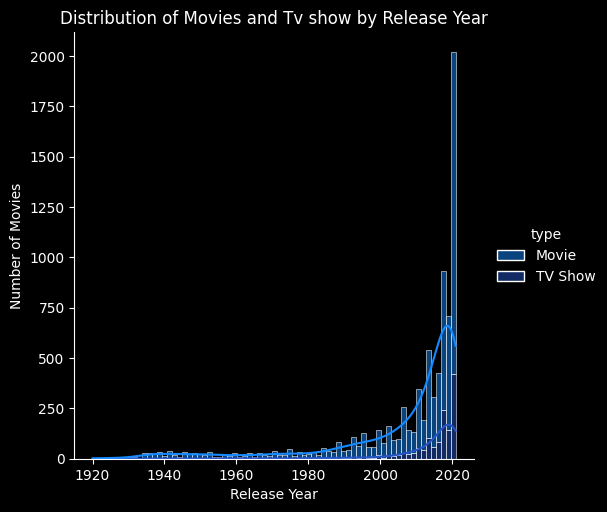

In [ ]:
plt.figure(figsize=(10, 5))
sns.displot(data, x="release_year", hue="type", multiple="stack",kde=True)
plt.title('Distribution of Movies and Tv show by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')